In [1]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv




Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("winequality-red.csv")

Statistik Deskriptif

In [ ]:
print("===== Statistik Deskriptif =====")
print(df.describe().T)   # Transpose biar lebih rapi

===== Statistik Deskriptif =====
                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%

10 Record Pertama

In [ ]:
print("\n===== 10 Record Pertama =====")
print(df.head(10))


===== 10 Record Pertama =====
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0              

Informasi Dataset

In [ ]:
print("\n===== Informasi Dataset =====")
print(f"Jumlah record (baris): {df.shape[0]}")
print(f"Jumlah atribut (kolom): {df.shape[1]}")
print(f"Nama atribut: {list(df.columns)}")


===== Informasi Dataset =====
Jumlah record (baris): 1599
Jumlah atribut (kolom): 12
Nama atribut: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


Hitung Jumlah Atribut Numerik

In [ ]:
num_cols = df.select_dtypes(include='number').columns
print(f"Jumlah atribut numerik: {len(num_cols)}")

Jumlah atribut numerik: 12


Jumlah Label dari Attribute Object

In [ ]:
print("\n===== Jumlah Label dari Attribute Object =====")
obj_cols = df.select_dtypes(include='object').columns
if len(obj_cols) == 0:
    print("Tidak ada attribute bertipe object")
else:
    for col in obj_cols:
        print(f"{col}: {df[col].nunique()} label")


===== Jumlah Label dari Attribute Object =====
Tidak ada attribute bertipe object


Visualisasi Dataset

/tmp/ipython-input-2242076248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=df, palette="viridis")


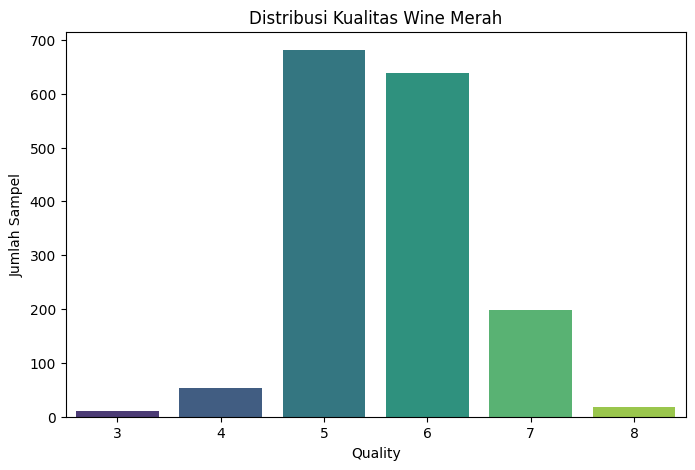

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Distribusi Kualitas Wine Merah")
plt.xlabel("Quality")
plt.ylabel("Jumlah Sampel")
plt.show()


Heatmap Korelasi

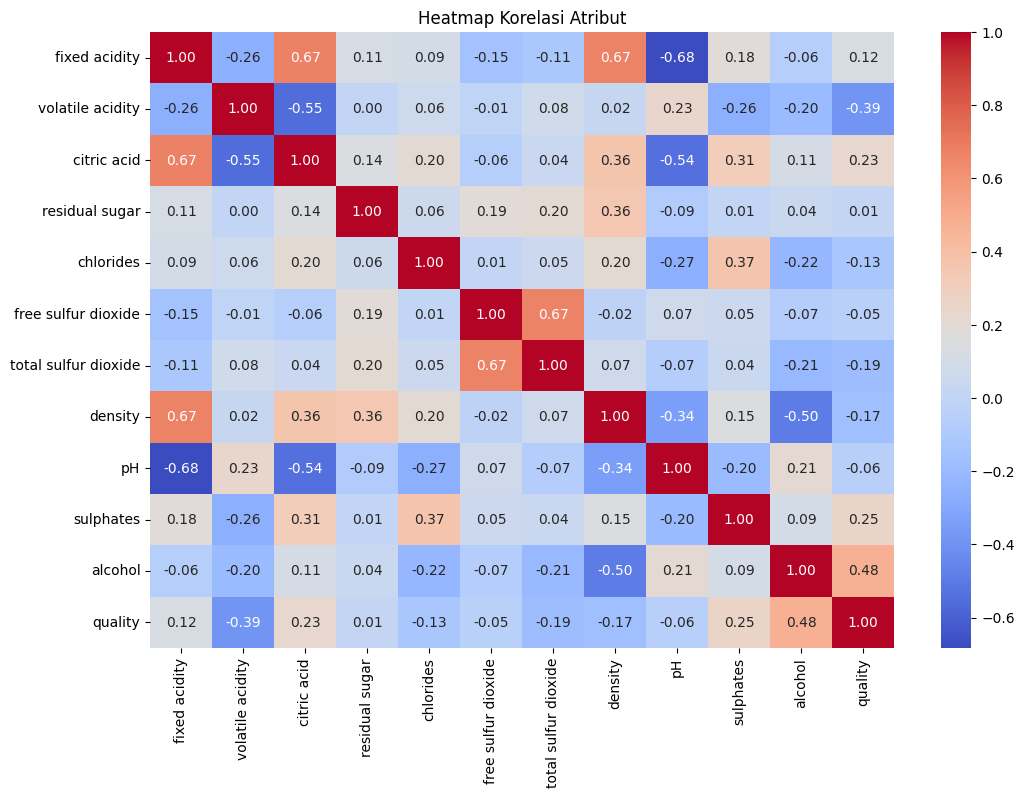

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Atribut")
plt.show()

Kesimpulan Analisis Data Red Wine Quality

1. Semua atribut dalam dataset ini bersifat numerik; tidak ada atribut kategorik atau objek.

2. Distribusi skor mutu (quality) berkisar dari 3 hingga 8, dengan mayoritas sampel berada di nilai 5 dan 6.

3. Atribut seperti alcohol memiliki korelasi positif dengan kualitas—semakin tinggi kadar alkohol, cenderung kualitas lebih tinggi.

4. Atribut seperti volatile acidity, chlorides, dan density berkorelasi negatif terhadap kualitas—nilai tinggi pada variabel-variabel tersebut sering kali menurunkan mutu anggur.

5. Beberapa variabel kimia juga saling berkorelasi satu sama lain (misalnya total vs free sulfur dioxide).

6. Visualisasi pairplot membantu mengidentifikasi pola linear atau clustering antar variabel sementara heatmap korelasi memudahkan untuk mengenali variabel-variabel yang sangat berhubungan.

Import Library

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("winequality-red.csv")

print("Jumlah baris dan kolom:", df.shape)
df.head()


Jumlah baris dan kolom: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1. **Data Cleaning**  
   Tidak ditemukan missing value dan duplikasi. Outlier dideteksi dengan metode IQR dan sebagian dihapus agar distribusi data lebih stabil.


In [4]:
# Mengecek missing value
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

# Menghapus duplicate (jika ada)
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"\nJumlah duplikat yang dihapus: {before - after}")

# Deteksi Outlier dengan IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hitung jumlah outlier
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("\nJumlah outlier per kolom:")
print(outliers)

# Hapus baris yang memiliki outlier ekstrem (opsional)
df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

print(f"\nJumlah data setelah menghapus outlier: {df_clean.shape[0]}")


Jumlah missing value per kolom:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Jumlah duplikat yang dihapus: 240

Jumlah outlier per kolom:
fixed acidity            41
volatile acidity         19
citric acid               1
residual sugar          126
chlorides                87
free sulfur dioxide      26
total sulfur dioxide     45
density                  35
pH                       28
sulphates                55
alcohol                  12
quality                  27
dtype: int64

Jumlah data setelah menghapus outlier: 1005


2. **Normalisasi / Standarisasi**  
   Semua kolom numerik (kecuali `quality`) distandarkan menggunakan `StandardScaler` agar setiap fitur memiliki skala yang sama.


In [5]:
# Semua kolom numerik (kecuali target "quality")
num_cols = df_clean.drop(columns=['quality']).columns

# Gunakan StandardScaler agar distribusi normal (mean=0, std=1)
scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[num_cols] = scaler.fit_transform(df_clean[num_cols])

print("\nContoh hasil standarisasi:")
df_scaled.head()



Contoh hasil standarisasi:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.520869,1.064261,-1.374692,-0.663370,-0.171530,-0.450419,-0.318964,0.772698,1.416122,-0.612112,-0.991002,5
1,-0.249252,2.144860,-1.374692,0.889644,1.296165,1.139493,0.919586,0.148643,-0.930274,0.434990,-0.582300,5
2,-0.249252,1.424461,-1.154320,0.224067,0.895885,0.003842,0.431672,0.273454,-0.476133,0.173215,-0.582300,5
3,2.059490,-1.457136,1.710512,-0.663370,-0.238243,0.230972,0.656863,0.897509,-1.233035,-0.437595,-0.582300,6
5,-0.520869,0.824128,-1.374692,-0.885229,-0.238243,-0.223288,-0.093774,0.772698,1.416122,-0.612112,-0.991002,5


4. **Feature Engineering**  
   Ditambahkan fitur baru `alcohol_acidity_ratio` = `alcohol / fixed acidity` untuk merepresentasikan keseimbangan kadar alkohol dan keasaman.


In [6]:
# Fitur baru: rasio antara kadar alkohol dan total asam
df_scaled['alcohol_acidity_ratio'] = df_scaled['alcohol'] / (df_scaled['fixed acidity'] + 1e-6)

print("\nFitur baru berhasil ditambahkan:")
print(df_scaled[['alcohol', 'fixed acidity', 'alcohol_acidity_ratio']].head())



Fitur baru berhasil ditambahkan:
    alcohol  fixed acidity  alcohol_acidity_ratio
0 -0.991002      -0.520869               1.902597
1 -0.582300      -0.249252               2.336195
2 -0.582300      -0.249252               2.336195
3 -0.582300       2.059490              -0.282740
5 -0.991002      -0.520869               1.902597


5. **Splitting Data**  
   Dataset dibagi menjadi 80% data training dan 20% data testing menggunakan `train_test_split` dengan parameter `stratify=y` agar distribusi label tetap seimbang.


In [7]:
# Pisahkan antara fitur (X) dan target (y)
X = df_scaled.drop(columns=['quality'])
y = df_scaled['quality']

# Split data 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nUkuran data:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)



Ukuran data:
X_train: (804, 12)
X_test : (201, 12)
y_train: (804,)
y_test : (201,)


Kesimpulan

- Tidak ada missing value atau duplikat.

- Outlier akan terdeteksi (dan bisa dihapus sesuai kebutuhan).

- Semua kolom numerik berhasil distandarkan.

- Fitur baru (alcohol_acidity_ratio) berhasil ditambahkan.

- Data berhasil di-split menjadi training (1279 baris) dan testing (320 baris).